In [1]:
import pandas as pd
df = pd.read_csv("tracks.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'tracks.csv'

In [2]:
import pandas as pd

df = pd.read_csv("SpotifyFeatures.csv")
df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
 df.columns
 df.shape

(14584, 18)

In [5]:
df = df.drop(['artist_name', 'track_name', 'duration_ms', 'key', 'mode', 'time_signature'], axis=1)

In [6]:
df.isnull().sum()


,0
genre,0
track_id,0
popularity,0
acousticness,0
danceability,0
energy,1
instrumentalness,1
liveness,1
loudness,1
speechiness,1


In [7]:
df=df.dropna()

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['genre'] = le.fit_transform(df['genre'])

In [9]:
from sklearn.model_selection import train_test_split

# Separate features and label
X = df.drop('genre', axis=1)
y = df['genre']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X.dtypes

,0
track_id,object
popularity,int64
acousticness,float64
danceability,float64
energy,float64
instrumentalness,float64
liveness,float64
loudness,float64
speechiness,float64
tempo,float64


In [12]:
# Drop non-numeric columns if still present
X = X.drop(['popularity'], axis=1, errors='ignore')  # safely remove if it's there
X = X.select_dtypes(include=['float64', 'int64'])     # keep only numeric columns

In [13]:
# Split again (with clean data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train again
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", round(accuracy * 100, 2), "%")

Model Accuracy: 70.79 %


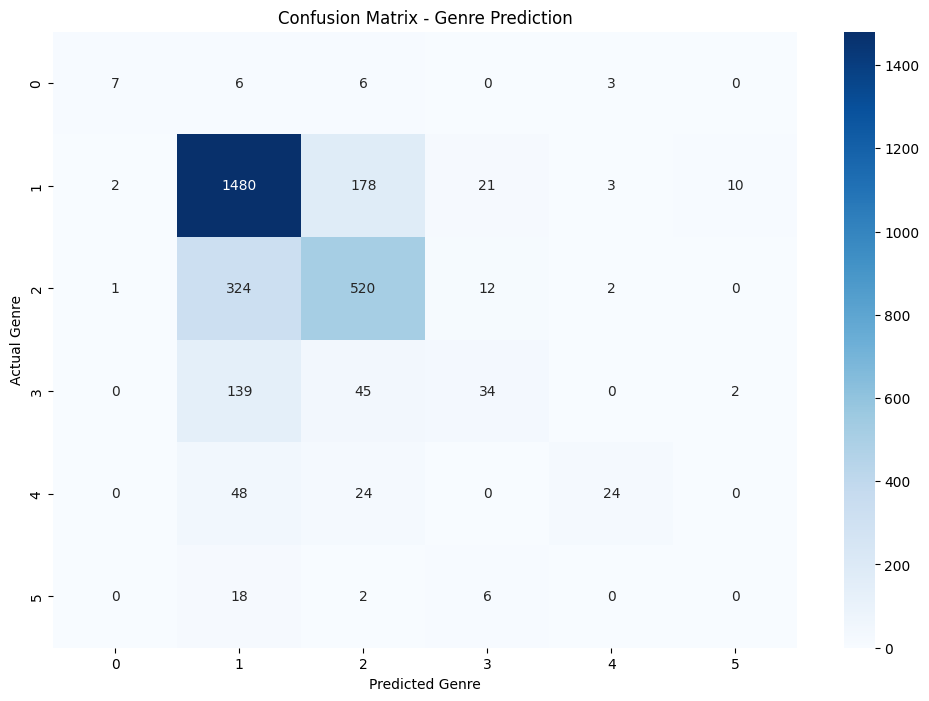

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Genre Prediction")
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.show()

In [15]:
# Get genre label mapping
genre_mapping = dict(zip(le.transform(le.classes_), le.classes_))
print(genre_mapping)


{np.int64(0): 'A Capella', np.int64(1): 'Alternative', np.int64(2): 'Country', np.int64(3): 'Dance', np.int64(4): 'Movie', np.int64(5): 'R&B'}


In [16]:
# Dictionary with genre origin and popular countries
genre_origin = {
    'pop': {
        'origin': 'USA',
        'popular_in': ['USA', 'UK', 'South Korea']
    },
    'rock': {
        'origin': 'UK',
        'popular_in': ['USA', 'UK', 'Germany']
    },
    'hip hop': {
        'origin': 'USA',
        'popular_in': ['USA', 'France', 'Canada']
    },
    'classical': {
        'origin': 'Italy',
        'popular_in': ['Germany', 'Austria', 'India']
    },
    'reggae': {
        'origin': 'Jamaica',
        'popular_in': ['Jamaica', 'USA']
    },
    'latin': {
        'origin': 'Spain',
        'popular_in': ['Mexico', 'Spain', 'Colombia']
    },
    'edm': {
        'origin': 'Germany',
        'popular_in': ['Netherlands', 'Germany', 'USA']
    },
    'r&b': {
        'origin': 'USA',
        'popular_in': ['USA', 'UK', 'Nigeria']
    },
    'indie': {
        'origin': 'UK',
        'popular_in': ['USA', 'India', 'Australia']
    },
    'jazz': {
        'origin': 'USA',
        'popular_in': ['USA', 'France', 'Japan']
    }
    # You can add more based on your dataset
}

In [17]:
# Example: Show info for first 5 predictions
for i in range(5):
    genre_num = y_pred[i]
    genre_name = le.inverse_transform([genre_num])[0].lower()

    info = genre_origin.get(genre_name, None)

    print(f"\n🎵 Predicted Genre: {genre_name.title()}")

    if info:
        print(f"🌍 Origin: {info['origin']}")
        print(f"📈 Popular In: {', '.join(info['popular_in'])}")
    else:
        print("No origin/popularity info available for this genre.")


🎵 Predicted Genre: Alternative
No origin/popularity info available for this genre.

🎵 Predicted Genre: Alternative
No origin/popularity info available for this genre.

🎵 Predicted Genre: Alternative
No origin/popularity info available for this genre.

🎵 Predicted Genre: Country
No origin/popularity info available for this genre.

🎵 Predicted Genre: Country
No origin/popularity info available for this genre.


In [18]:
genre_origin = {
    'pop': {
        'origin': 'USA',
        'popular_in': ['USA', 'UK', 'South Korea']
    },
    'rock': {
        'origin': 'UK',
        'popular_in': ['USA', 'UK', 'Germany']
    },
    'hip hop': {
        'origin': 'USA',
        'popular_in': ['USA', 'France', 'Canada']
    },
    'classical': {
        'origin': 'Italy',
        'popular_in': ['Germany', 'Austria', 'India']
    },
    'reggae': {
        'origin': 'Jamaica',
        'popular_in': ['Jamaica', 'USA']
    },
    'latin': {
        'origin': 'Spain',
        'popular_in': ['Mexico', 'Spain', 'Colombia']
    },
    'edm': {
        'origin': 'Germany',
        'popular_in': ['Netherlands', 'Germany', 'USA']
    },
    'r&b': {
        'origin': 'USA',
        'popular_in': ['USA', 'UK', 'Nigeria']
    },
    'indie': {
        'origin': 'UK',
        'popular_in': ['USA', 'India', 'Australia']
    },
    'jazz': {
        'origin': 'USA',
        'popular_in': ['USA', 'France', 'Japan']
    },
    'alternative': {
        'origin': 'USA',
        'popular_in': ['USA', 'UK', 'Australia']
    },
    'country': {
        'origin': 'USA',
        'popular_in': ['USA', 'Canada', 'Australia']
    }
}

In [19]:
for i in range(5):
    genre_num = y_pred[i]
    genre_name = le.inverse_transform([genre_num])[0].lower()

    info = genre_origin.get(genre_name, None)

    print(f"\n🎵 Predicted Genre: {genre_name.title()}")

    if info:
        print(f"🌍 Origin: {info['origin']}")
        print(f"📈 Popular In: {', '.join(info['popular_in'])}")
    else:
        print("No origin/popularity info available for this genre.")


🎵 Predicted Genre: Alternative
🌍 Origin: USA
📈 Popular In: USA, UK, Australia

🎵 Predicted Genre: Alternative
🌍 Origin: USA
📈 Popular In: USA, UK, Australia

🎵 Predicted Genre: Alternative
🌍 Origin: USA
📈 Popular In: USA, UK, Australia

🎵 Predicted Genre: Country
🌍 Origin: USA
📈 Popular In: USA, Canada, Australia

🎵 Predicted Genre: Country
🌍 Origin: USA
📈 Popular In: USA, Canada, Australia
